# Linear Regression on 5JUN2023 data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
import shap

## load data
* fill missing values with `0`
* set male to `0` and female to `1`

In [4]:
df = pd.read_csv("../data/5JUN2023_Provisional_endo_study_data_to_test_AI.csv").fillna(0)
df.Sex = np.where(df.Sex == "male", 0, 1)
# df.Sex = df.Sex.astype('category')
df.head()

,Sex,A_EPM_distance,A_EPM_pct_open_arms,A_Open_field_distance,A_LOF_pct_center,RP_Withdrawal_latency,OR_lick_time,OR_num_lick_bursts,OR__Lick_burst_length,FSA_Consumption_time,DSA_1st_week_infusions,OPAD_37oC__lick_face,OPAD_46_5oC_lick_face,RP_Delta_hargreaves
0,0,1272.67,31.58,5128.37,12.46,14.48,97.350,69.25,1.372342,66.45,86.0,10.25,1.50,0.06
1,0,1272.52,18.75,5037.27,10.68,14.84,85.125,105.00,1.444197,75.28,87.0,24.75,5.50,0.17
2,0,1462.30,29.03,5340.03,19.06,11.68,205.375,112.75,1.459464,64.88,120.0,15.00,5.00,-1.38
3,0,1288.02,20.59,5384.21,5.36,12.69,185.550,71.75,1.312209,29.45,94.0,15.75,4.25,-0.41
4,0,880.52,4.35,3919.19,1.65,17.56,239.200,136.75,1.912567,61.02,108.0,18.75,5.00,2.49


## heatmap
For fun, let's look at a heatmap of correlation matrix. 

The highest **positive** correlations for `DSA_1st_week_infusions` are:
* `OR_lick_time`
* `FSA_Consumption_time`
* `OPAD_46_5oC_lick_face`

The highest **negative** correlations for `DSA_1st_week_infusions` are:
* `OPAD_37oC__lick_face`
* `Sex`
* `RP_Delta_hargreaves`


Code for heatmap found here: https://stackoverflow.com/questions/39409866/correlation-heatmap

In [5]:
corr_df = df.corr()

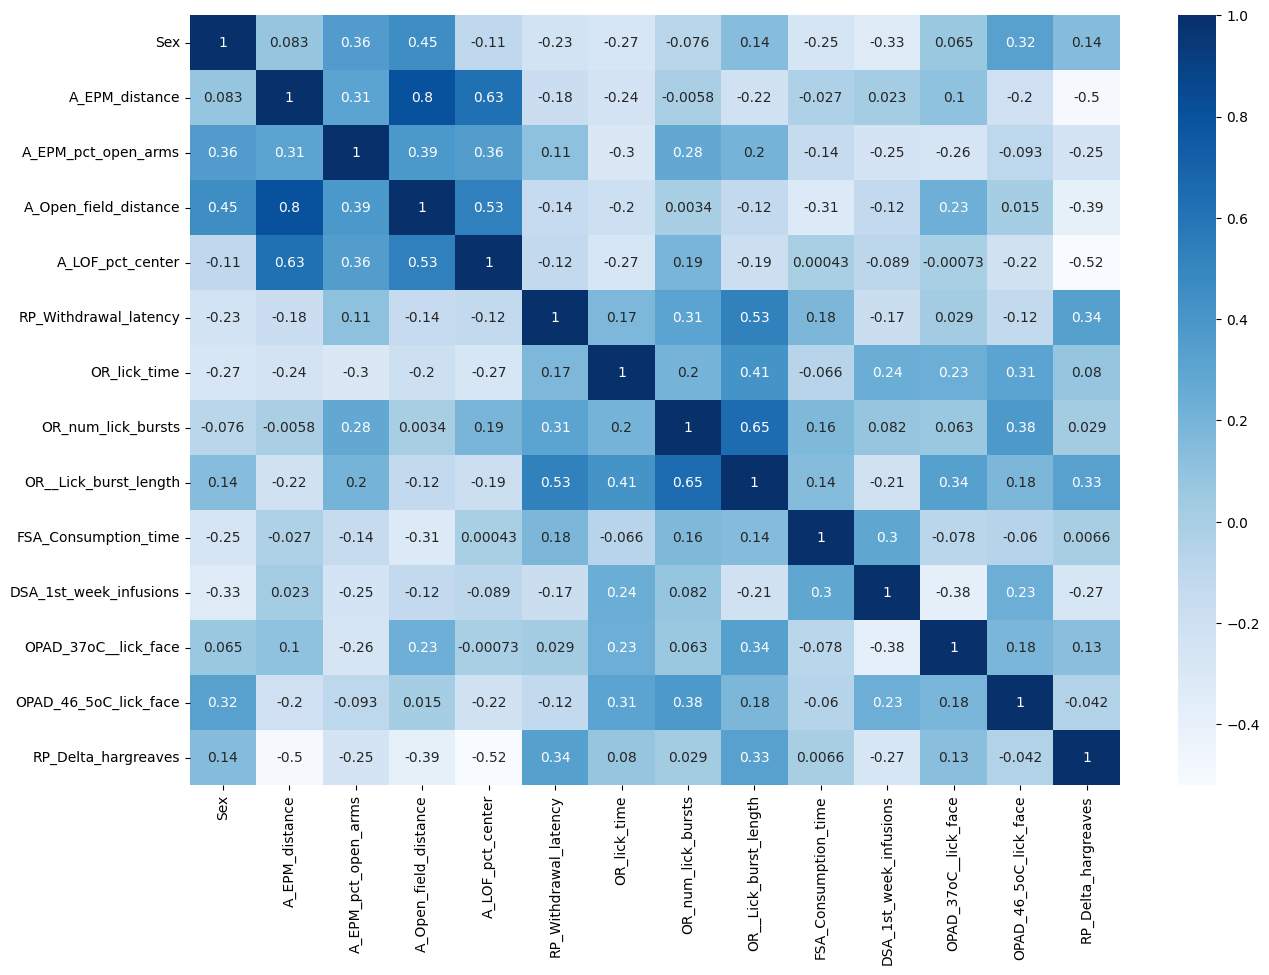

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_df, cmap="Blues", annot=True)
plt.show()

#### perform linear regresion on highest **positive** correlations
* y=`DSA_1st_week_infusions`
* x=`OR_lick_time`, `FSA_Consumption_time`, `OPAD_46_5oC_lick_face`

In [7]:
temp_df = df[["OR_lick_time", "FSA_Consumption_time", "OPAD_46_5oC_lick_face"]]

#### set feature and target data  
* `values` converts column into a `numpy` array
* `-1` means that calculate the dimension of rows, but have 1 column

In [8]:
# set target
y = df.DSA_1st_week_infusions.values.reshape(-1, 1)

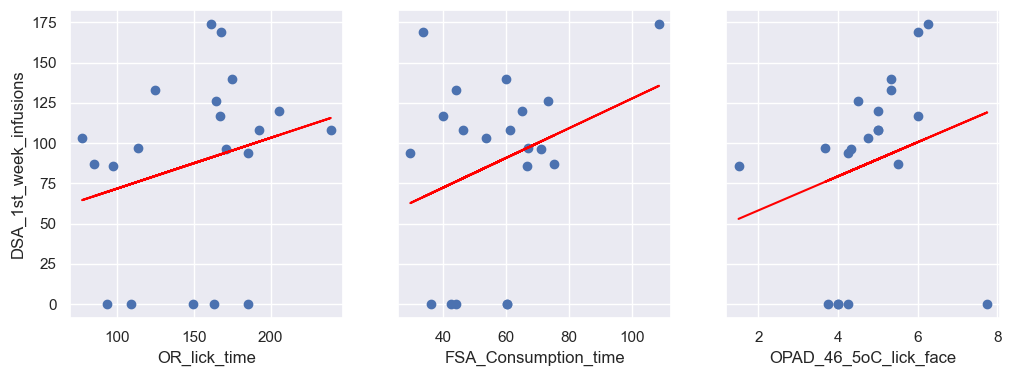

In [9]:
# fig with 1 row, 3 cols
sns.set(font_scale=1)
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12,4))

# instantiate linear regress model
model = LinearRegression()

for i, col in enumerate(temp_df.columns):
    x = df[col].values.reshape(-1, 1) # get col as numpy array

    # fit & predict
    model.fit(x, y)
    y_pred = model.predict(x)

    # plot results
    axs[i].scatter(x, y)
    axs[i].plot(x, y_pred, color='red')
    axs[i].set_xlabel(col)

# set shared y axis
axs[0].set_ylabel("DSA_1st_week_infusions")
plt.show()

#### perform linear regresion on highest **negative** correlations
* y=`DSA_1st_week_infusions`
* x=`OPAD_37oC__lick_face`, `Sex`, `RP_Delta_hargreaves`

In [10]:
temp_df = df[["OPAD_37oC__lick_face", "Sex", "RP_Delta_hargreaves"]]

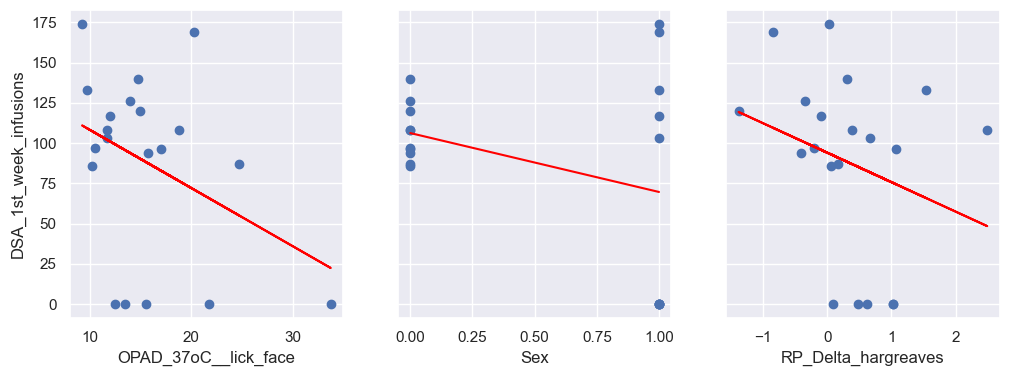

In [11]:
# fig with 1 row, 3 cols
sns.set(font_scale=1)
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12,4))

# instantiate linear regress model
model = LinearRegression()

for i, col in enumerate(temp_df.columns):
    x = df[col].values.reshape(-1, 1) # get col as numpy array

    # fit & predict
    model.fit(x, y)
    y_pred = model.predict(x)

    # plot results
    axs[i].scatter(x, y)
    axs[i].plot(x, y_pred, color='red')
    axs[i].set_xlabel(col)

# set shared y axis
axs[0].set_ylabel("DSA_1st_week_infusions")
plt.show()

## perform pairplot to see how other variables are correlated.
The resuls are a bit hard to read, but you can open up the `linear_regression_pairplot_5JUN2023.png` image and zoom in.

<Figure size 100000x100000 with 0 Axes>

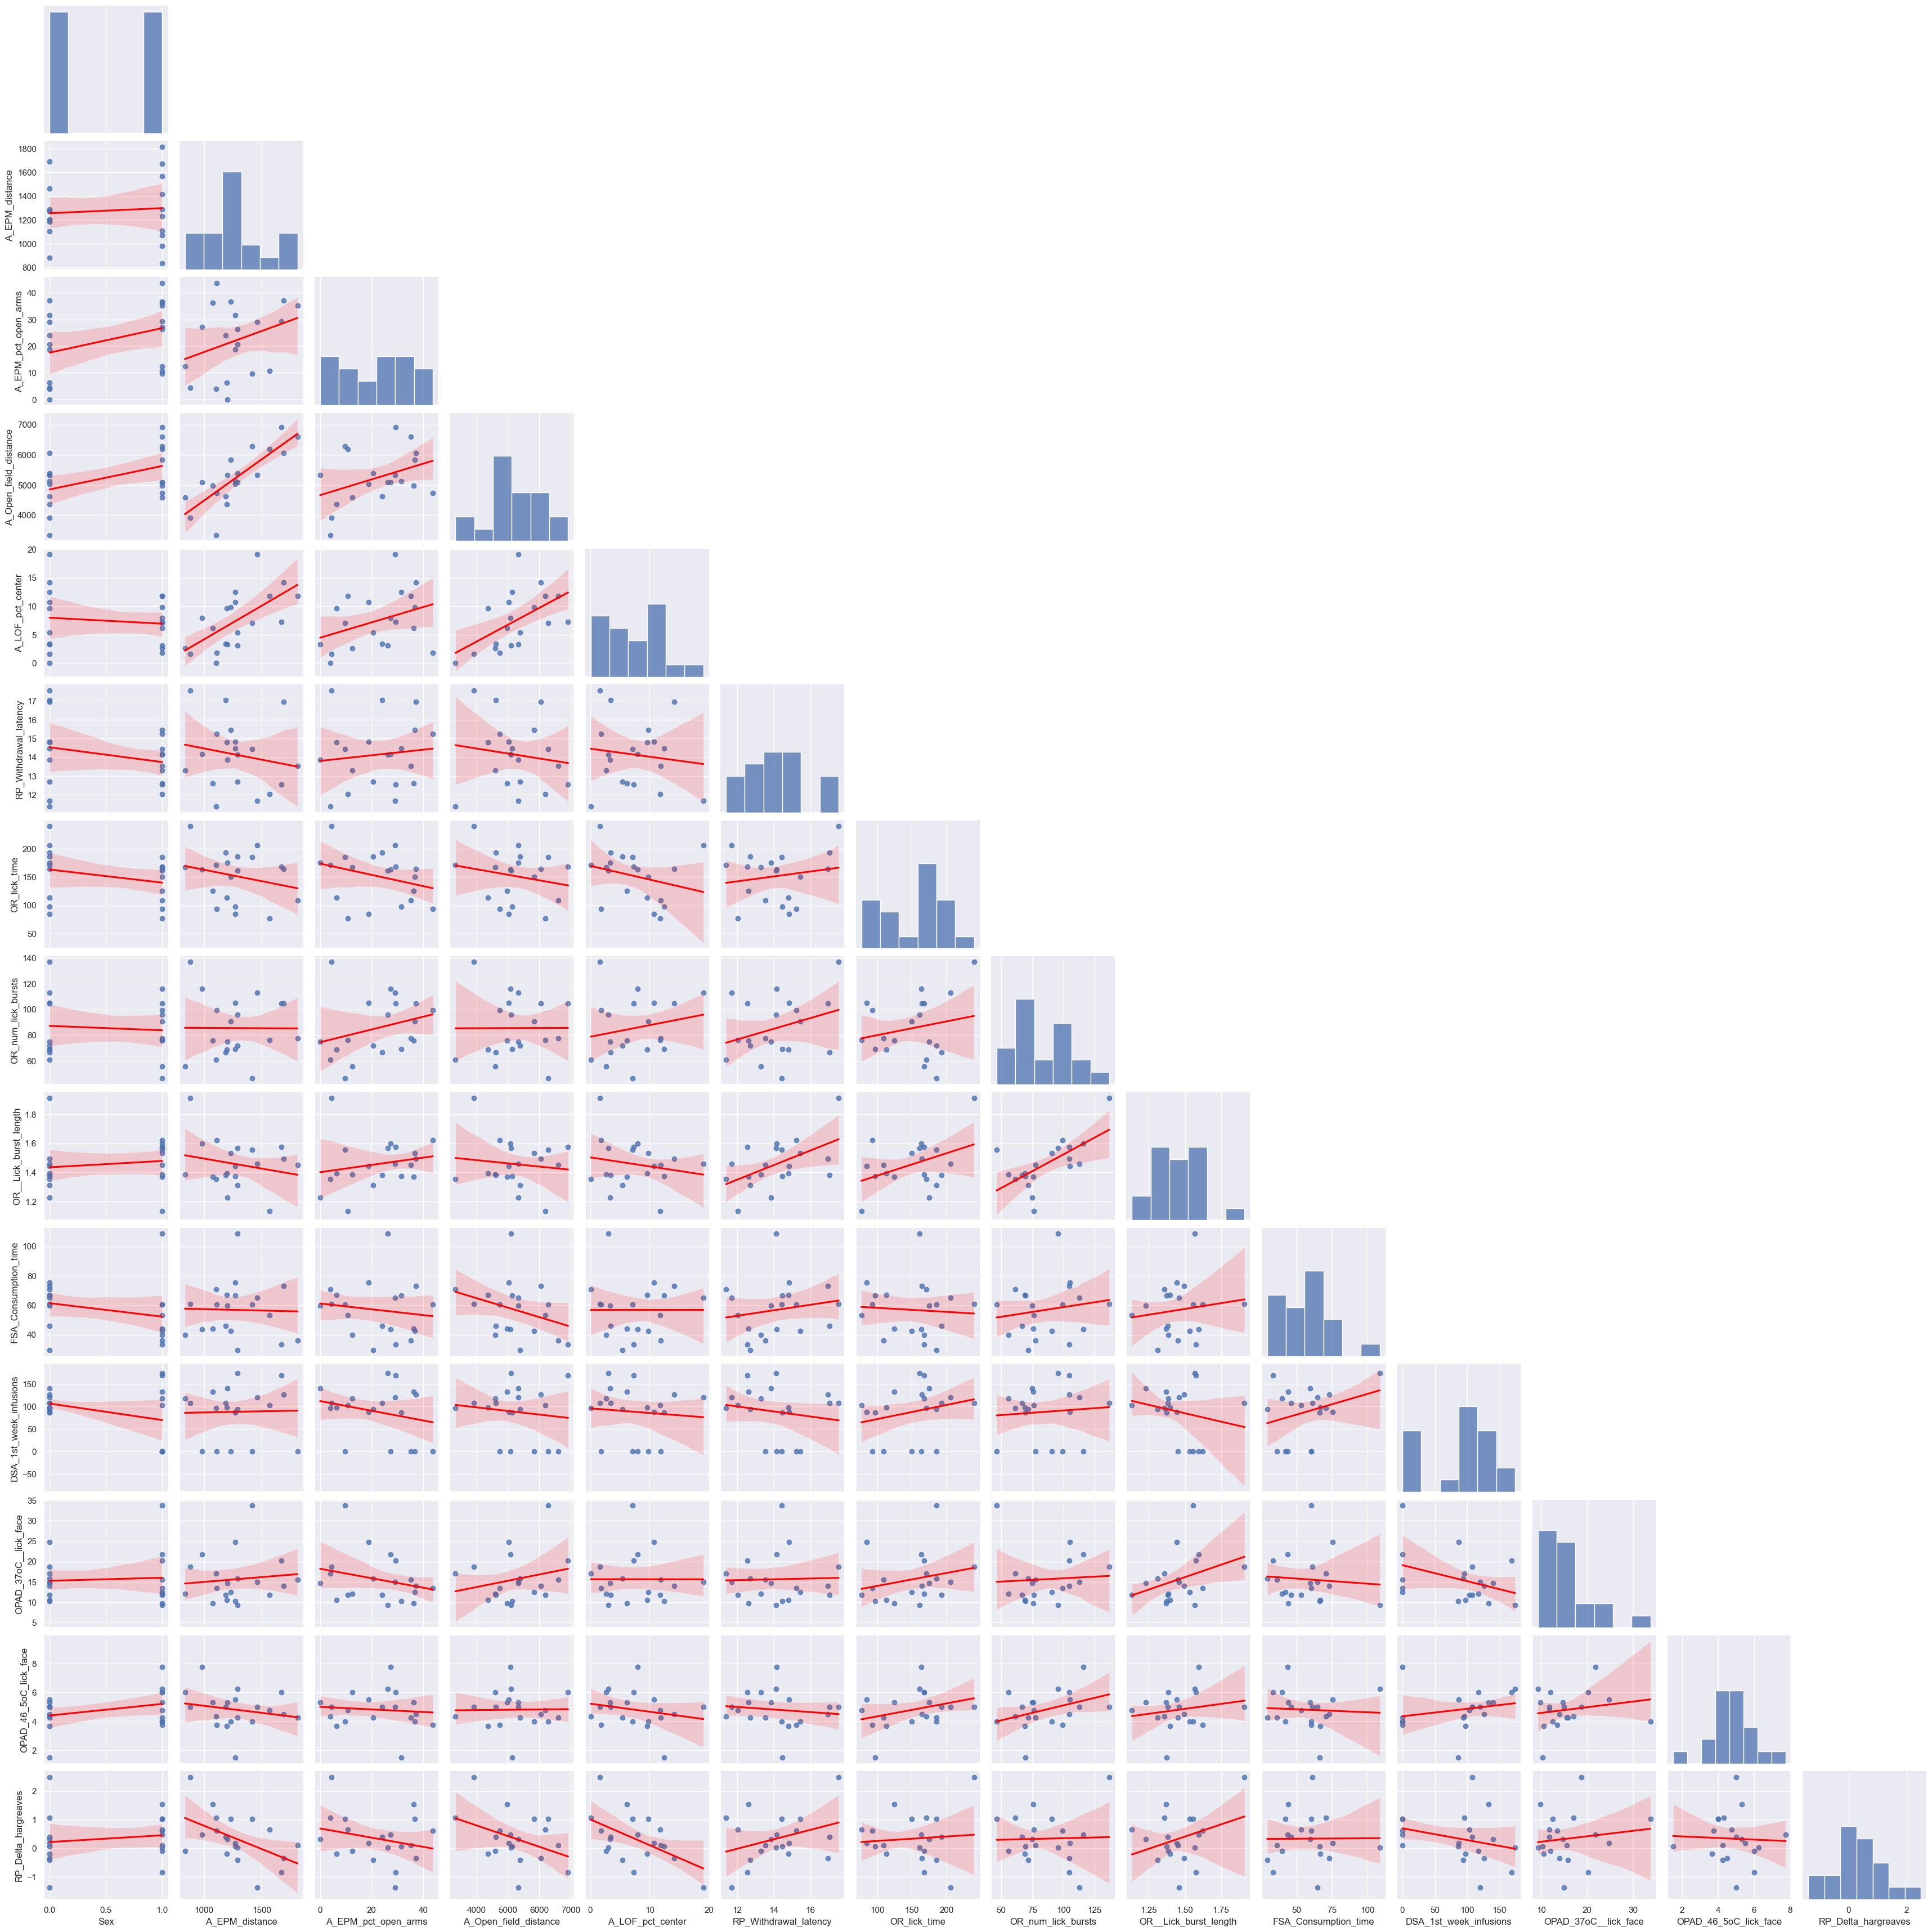

In [12]:
plt.figure(figsize=(1000,1000))
sns.set(font_scale=1)
sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}}, corner=True)
plt.savefig("../images/5JUN2023_linear_regression_pairplot.png", format="png", dpi=600)
plt.show()

## SHAP values
* https://medium.com/dataman-in-ai/explain-your-model-with-the-shap-values-bc36aac4de3d

In [13]:
X, y = df.drop('DSA_1st_week_infusions', axis=1), df.DSA_1st_week_infusions

In [14]:
# instantiate linear regress model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [15]:
X.columns.to_list()

['Sex',
 'A_EPM_distance',
 'A_EPM_pct_open_arms',
 'A_Open_field_distance',
 'A_LOF_pct_center',
 'RP_Withdrawal_latency',
 'OR_lick_time',
 'OR_num_lick_bursts',
 'OR__Lick_burst_length',
 'FSA_Consumption_time',
 'OPAD_37oC__lick_face',
 'OPAD_46_5oC_lick_face',
 'RP_Delta_hargreaves']

In [16]:
# need to change int and bool to classes int_ and bool_ to handle error 'numpy' has no attribute 'int'/'bool'/etc.
np.bool = np.bool_
np.int = np.int_
np.float = np.float_

explainer = shap.LinearExplainer(model, X, feature_names=X.columns.tolist())
shap_values = explainer(X)

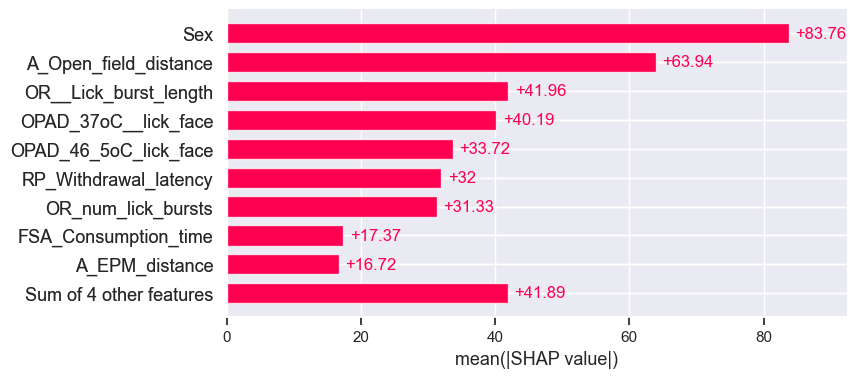

In [17]:
# see https://towardsdatascience.com/how-to-easily-customize-shap-plots-in-python-fdff9c0483f2 for configuring shap plots
shap.plots.bar(shap_values, show = False)
plt.gcf().set_size_inches(8,4)
plt.show()

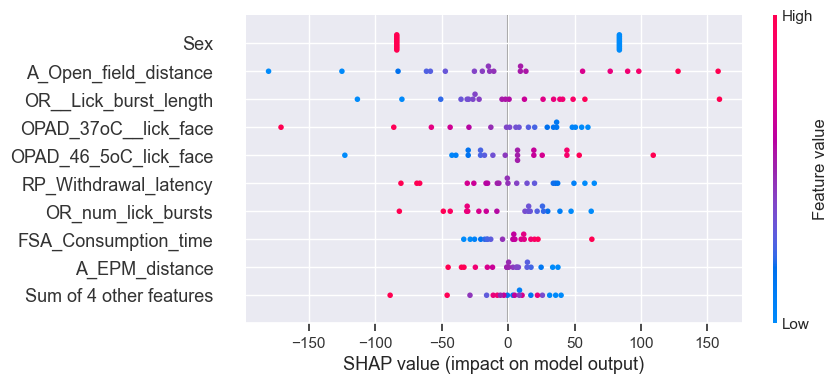

In [18]:
shap.plots.beeswarm(shap_values, plot_size=(8, 4))

In [19]:
# shap.summary_plot(shap_values, X, plot_size=(8, 4)) # similar to beeswarm but shows the bottom 4 features

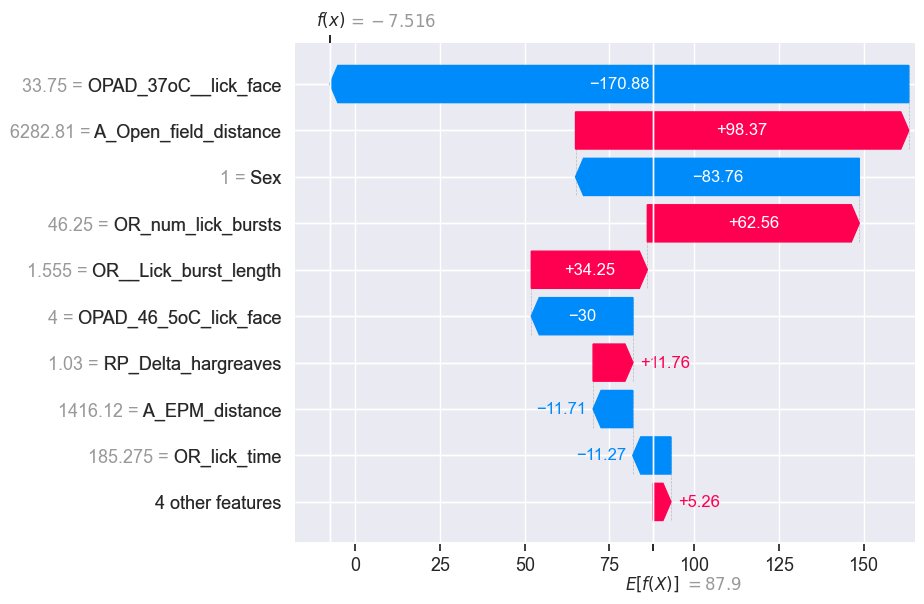

In [20]:
shap.plots.waterfall(shap_values[10]) # see indivual record

In [21]:
shap.initjs()
shap.plots.force(shap_values[10]) # see indivual record